In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head(5)

,Unnamed: 0,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,1,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,2,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,3,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,4,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,5,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Drop unnecessary columns
data = data.drop(data.columns[[0, 1, 2]],axis = 1)

In [ ]:
data.tail(5)

,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [ ]:
#overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer.Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type.of.Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight.Distance                    129880 non-null  int64  
 6   Inflight.wifi.service              129880 non-null  int64  
 7   Departure.Arrival.time.convenient  129880 non-null  int64  
 8   Ease.of.Online.booking             129880 non-null  int64  
 9   Gate.location                      129880 non-null  int64  
 10  Food.and.drink                     129880 non-null  int64  
 11  Online.boarding                    1298

In [ ]:
# Convert categorical variables to numerical
cat_indexes = [0, 1, 3, 4] + list(range(6, 20))
data[data.columns[cat_indexes]] = data[data.columns[cat_indexes]].astype('category')

In [ ]:
#describing numerical dat
data.describe()

,Age,Flight.Distance,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
#describing categorical data
data.describe(include = 'category')

,Gender,Customer.Type,Type.of.Travel,Class,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969


([<matplotlib.patches.Wedge at 0x7f1a799be230>,
 [Text(-0.22488421808296186, 1.0767669610724575, 'Neutral or dissatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Satisfied')],
 [Text(-0.12266411895434282, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

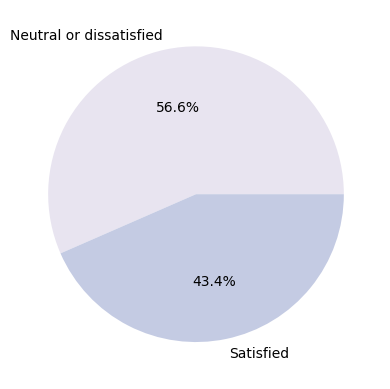

In [ ]:
#pie chart of satisfaction
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("PuBu"), autopct='%1.1f%%')

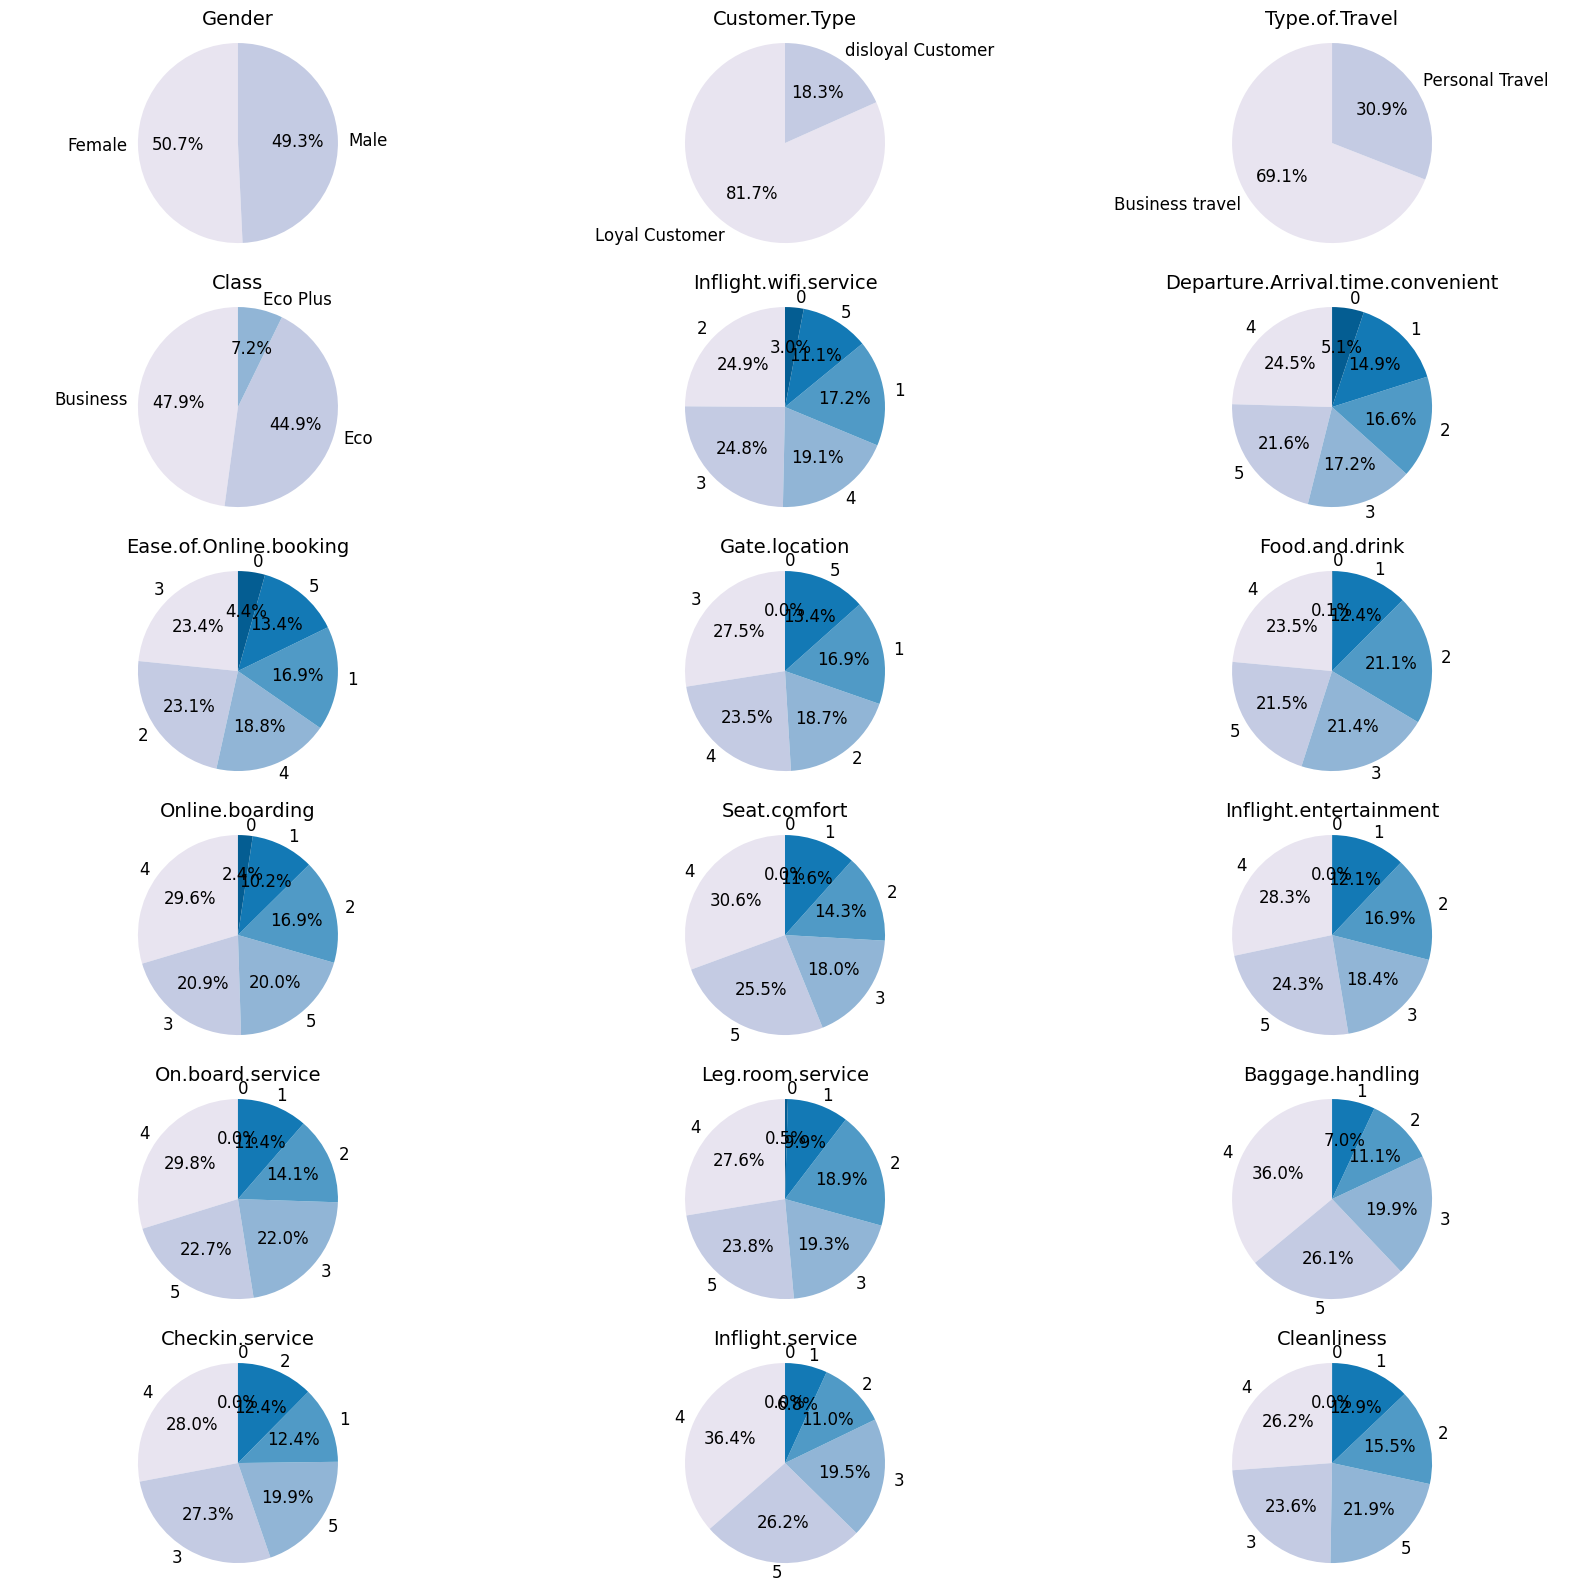

In [ ]:
catego = data.iloc[:,cat_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(catego):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("PuBu"), autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 12})
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col, fontdict={'fontsize': 14})
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables to numerical
cat_indexes = [0, 1, 3, 4] + list(range(6, 20))

df = data.copy()

for col_index in cat_indexes:
    le = LabelEncoder()
    df[df.columns[col_index]] = le.fit_transform(data[df.columns[col_index]])

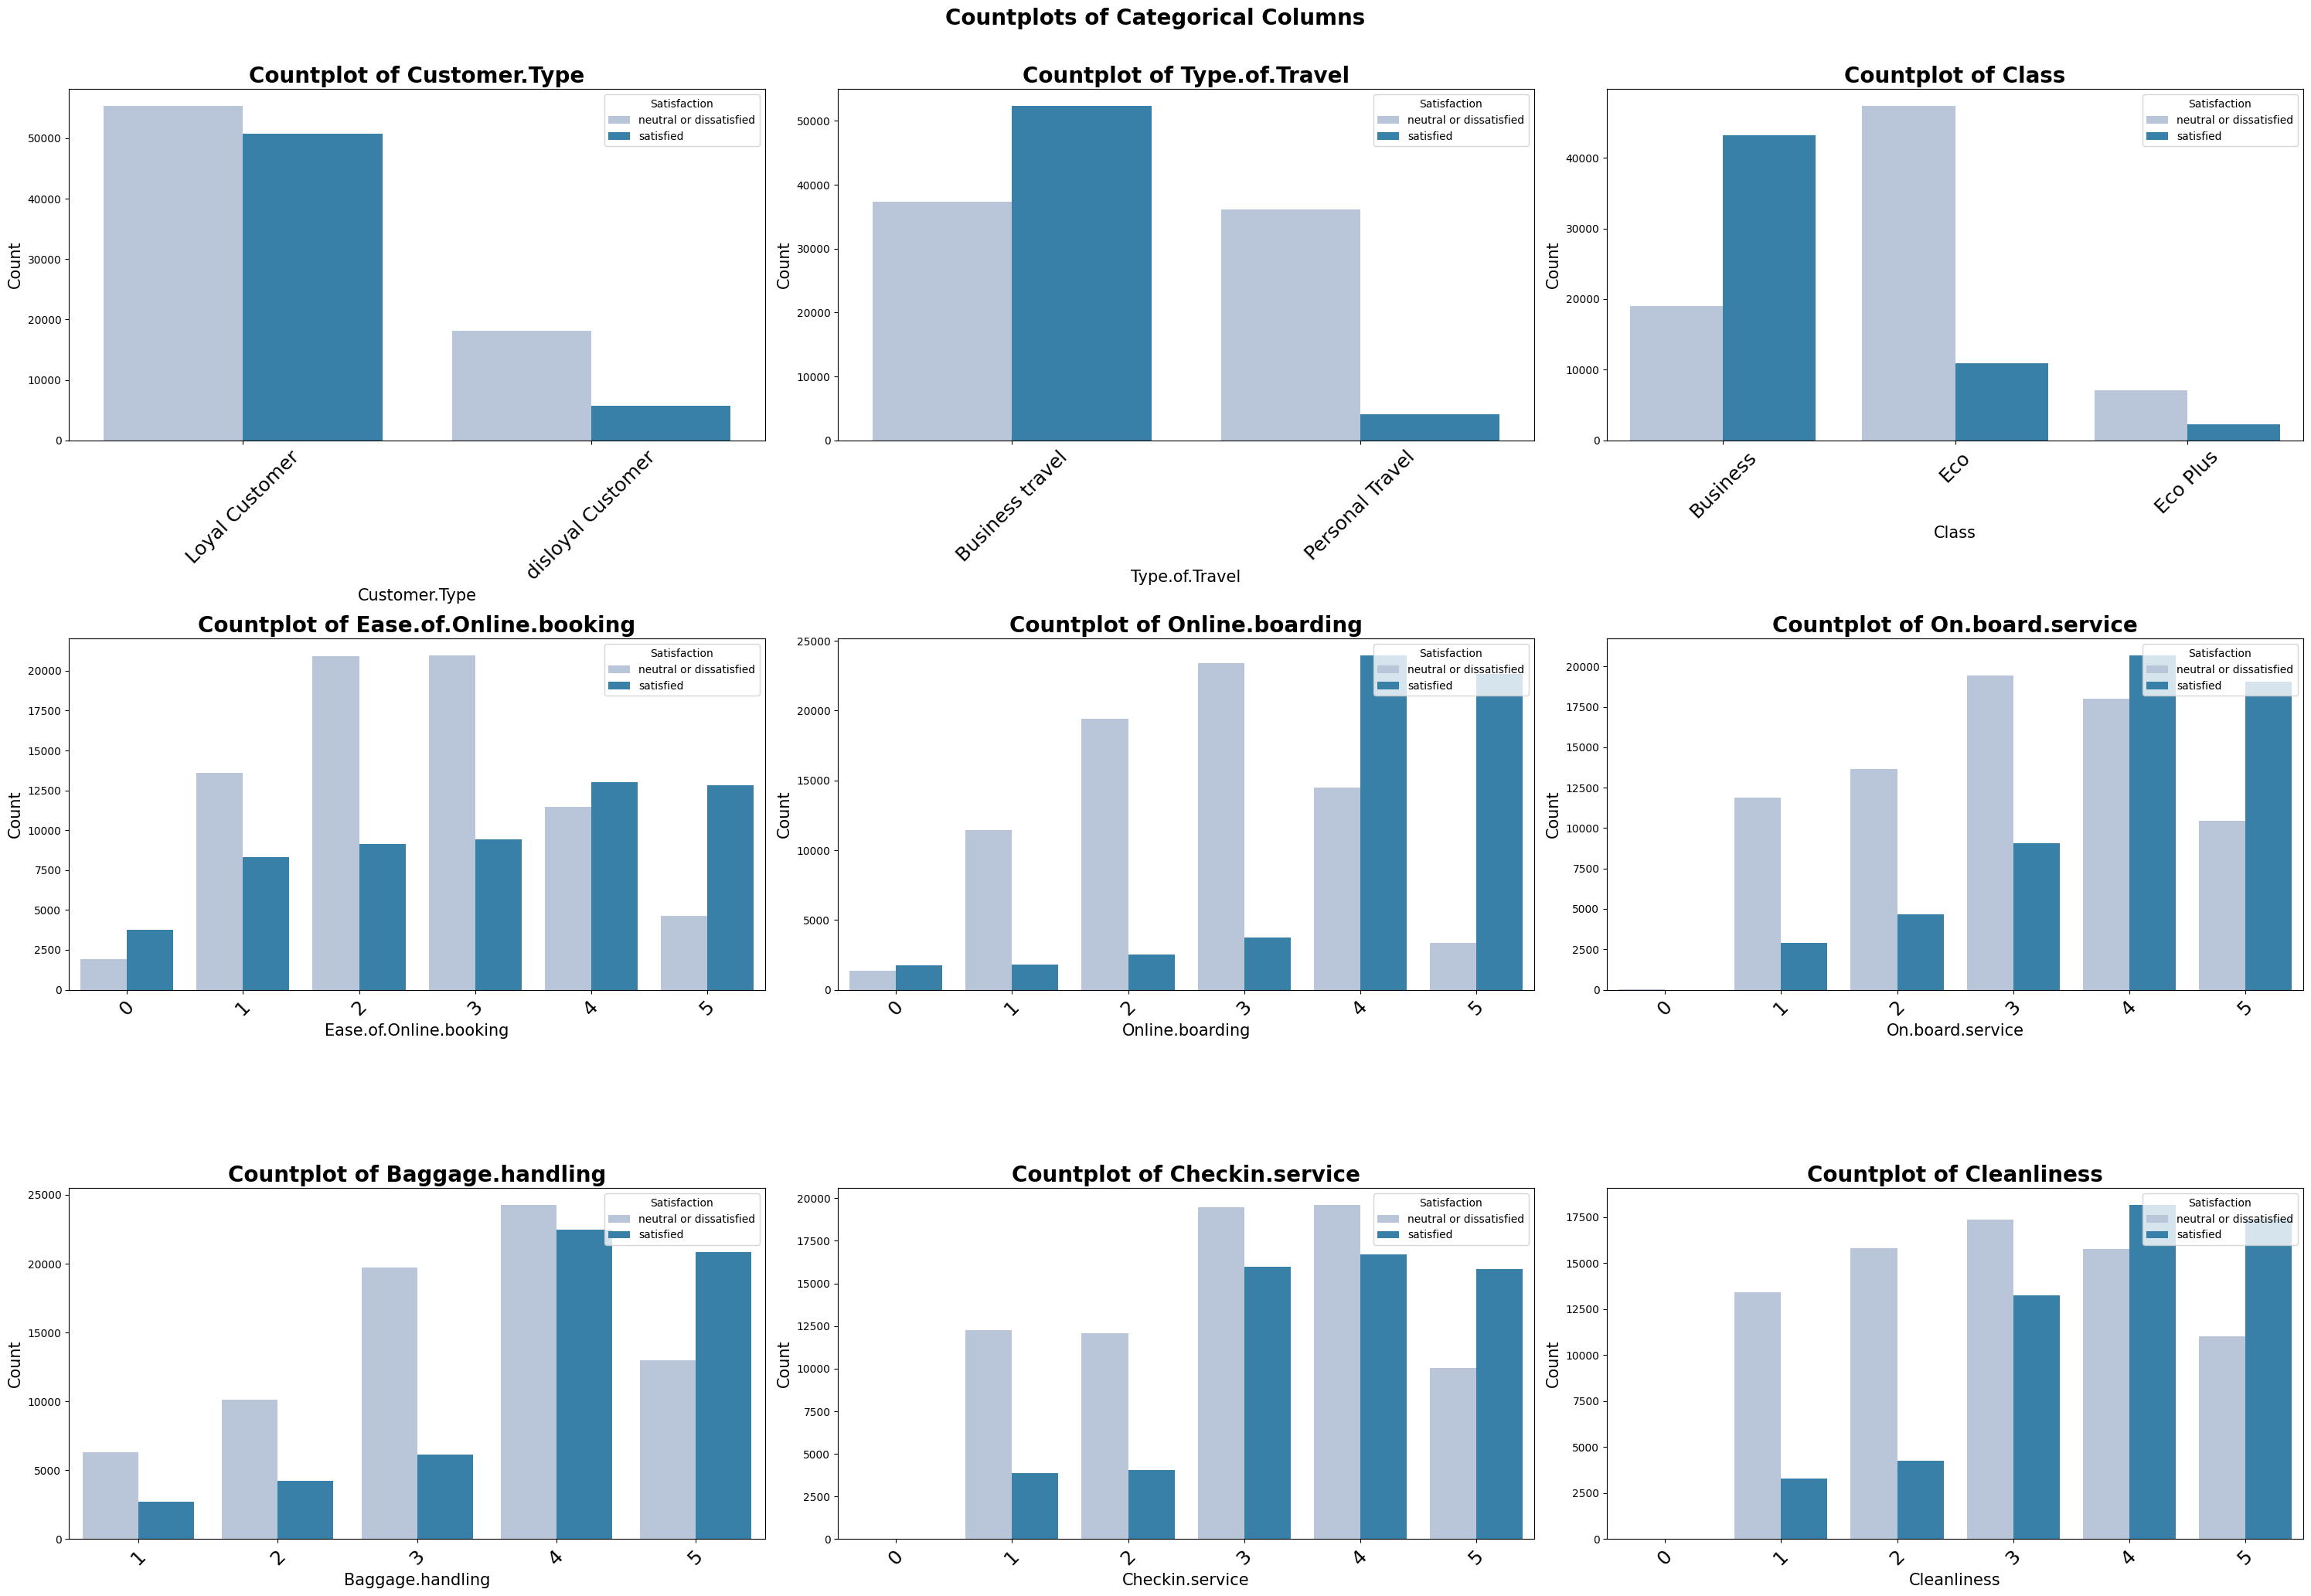

In [ ]:
# List of categorical columns to plot
categorical_columns = ['Customer.Type', 'Type.of.Travel', 'Class', 'Ease.of.Online.booking', 'Online.boarding', 'On.board.service', 'Baggage.handling', 'Checkin.service','Cleanliness']

# Define the number of rows and columns in the grid
n_rows = 3
n_cols = 3

# Create a grid of countplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 20))

# Iterate over columns and create countplots
for i, column in enumerate(categorical_columns):
    row = i // n_cols  # Calculate the row index
    col = i % n_cols   # Calculate the column index
    
    # Create countplot in the corresponding subplot
    ax = axes[row, col]
    sns.countplot(x=column, hue='satisfaction', palette='PuBu', data=data, ax=ax)
    ax.set_title(f'Countplot of {column}', fontsize=20, fontweight = 'bold')
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Count', fontsize = 15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelsize=18)  
    ax.legend(title='Satisfaction', loc='upper right')

# Remove empty subplots if any
if len(categorical_columns) < (n_rows * n_cols):
    for j in range(len(categorical_columns), (n_rows * n_cols)):
        row = j // n_cols  # Calculate the row index
        col = j % n_cols   # Calculate the column index
        fig.delaxes(axes[row, col])

# Adjust spacing between subplots
fig.tight_layout()

# Set the overall title of the grid
fig.suptitle('Countplots of Categorical Columns', fontsize=20,  fontweight='bold', y=1.03)

# Show the grid of countplots
plt.show()
